### Predicting Used Car Sale Prices

**Forecasting Problem**

This analysis predicts second-hand vehicle prices using regression models, leveraging various features to provide critical insights that guide decision-making for different stakeholders. The analysis utilizes 7,000 data points for training and 3,000 for testing. 

Potential car buyers benefit by evaluating the cost-effectiveness of each second-hand vehicle, allowing them to make informed purchasing decisions within their budget. Similarly, sellers and current owners can use these predictions to maximize profits by setting competitive prices that attract buyers. Dealerships might use this data to forecast total sales and profits in upcoming quarters, integrating predictions with other factors such as demand and cost projections. Banks and insurance companies also stand to gain, as the car's sale price impacts their revenue streams, especially since car purchases often involve loans and insurance coverage is mandatory. Overall, accurate used car pricing predictions enhance market transparency, facilitating better decisions for all involved.


**Evaluation Criteria**

To assess our regression machine learning model's forecasting performance, we employ the Mean Absolute Percentage Error (MAPE) as our evaluation metric. MAPE measures the average of the absolute percentages by which predictions differ from actual values. This metric is  effective because a lower MAPE signifies a more accurate model, directly reflecting the model’s precision in predicting new, unseen data. Here is the equation of MAPE:

$$ \text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| $$


**Categorising Variables**

|Variable Kind|Number of Features|Feature Names
| --- | --- | --- |
| Numeric | 22 | `back_legroom` `city_fuel_economy` `daysonmarket` `engine_displacement` `front_legroom` `fuel_tank_volume` `height` `highway_fuel_economy` ` horsepower` ` latitude` `length` `listed_date` `longitude` `maximum_seating` `mileage` ` power` `savings_amount` `torque` `wheelbase` `width`  `seller_rating` `year` |
| Norminal  | 16 | `vin` `body_type` `city` `dealer_zip` `engine_type` `exterior_color` `franchise_dealer` `fuel_type` `interior_color` `is_new` `listing_color` `make_name` `model_name` `transmission` `transmission_display` `wheel_system` |

**Missing Value**

As shown in the below table, the training dataset has missing values in 19 features, whereas the test dataset has them in 26 features. In both datasets, 'interior_color' records the highest number of missing values, with 805 missing in the training set and 379 missing in test set. 

These missing values pose significant challenges; if not properly addressed, they can lead to models learning incorrect relationships between variables. Furthermore, non-random distribution of these missing values may introduce bias, affecting the model's overall accuracy and reliability. Additionally, regression models, which require complete datasets for training, are particularly vulnerable to issues arising from incomplete data.
| No. | Feature               | Train Dataset |     | No. | Feature                  | Test Dataset |
|-----|-----------------------|-------------------|-----|-----|--------------------------|--------------|
| 1   | interior_color        | 805               |     | 1   | interior_color           | 379          |
| 2   | mileage               | 282               |     | 2   | torque                   | 365          |
| 3   | latitude              | 134               |     | 3   | highway_fuel_economy     | 349          |
| 4   | exterior_color        | 110               |     | 4   | city_fuel_economy        | 349          |
| 5   | savings_amount        | 108               |     | 5   | power                    | 325          |
| 6   | seller_rating         | 100               |     | 6   | mileage                  | 149          |
| 7   | franchise_dealer      | 84                |     | 7   | transmission             | 59           |
| 8   | transmission_display  | 75                |     | 8   | transmission_display     | 59           |
| 9   | transmission          | 75                |     | 9   | engine_type              | 59           |
| 10  | power                 | 8                 |     | 10  | fuel_type                | 45           |
| 11  | length                | 3                 |     | 11  | exterior_color           | 45           |
| 12  | back_legroom          | 3                 |     | 12  | savings_amount           | 42           |
| 13  | height                | 3                 |     | 13  | latitude                 | 41           |
| 14  | front_legroom         | 3                 |     | 14  | franchise_dealer         | 39           |
| 15  | fuel_tank_volume      | 3                 |     | 15  | seller_rating            | 29           |
| 16  | wheelbase             | 3                 |     | 16  | horsepower               | 27           |
| 17  | width                 | 3                 |     | 17  | engine_displacement      | 27           |
| 18  | maximum_seating       | 3                 |     | 18  | height                   | 25           |
| 19  | wheel_system          | 2                 |     | 19  | front_legroom            | 25           |
|     |                       |                   |     | 20  | back_legroom             | 25           |
|     |                       |                   |     | 21  | length                   | 25           |
|     |                       |                   |     | 22  | wheelbase                | 25           |
|     |                       |                   |     | 23  | fuel_tank_volume         | 25           |
|     |                       |                   |     | 24  | width                    | 25           |
|     |                       |                   |     | 25  | maximum_seating          | 25           |
|     |                       |                   |     | 26  | wheel_system             | 9            |


**Interesting Univariate Summary Statistics and Distributions**

From the analysis of descriptive statistics, histograms, and charts, we have derived several intriguing insights about the second-hand car market.

The histogram for mileage indicates that nearly half of the vehicles have zero mileage. This suggests that many of the cars in the second-hand market are not actually "second-hand;" instead, they may primarily be display or demo cars.

Moreover, the median days on market for these cars is 36 days, indicating a swift turnover in the second-hand car market, which is a positive sign of market health and consumer interest.

The pricing analysis reveals variation in the second-hand car market. Prices range from a minimum of \\$650 to a maximum of \\$350,000, with an interquartile range from around \\$18,000 to \\$37,000 and a median price around \\$25,400. This wide range marks the presence of several


Finally, we found Ford, Chevrolet, Honda, and Nissan rank among the top five brands in both the training and testing datasets. Toyota and Jeep are also among the top five in the training and test datasets respectively. These show the popularity of American and Japanese manufacturers in the market.



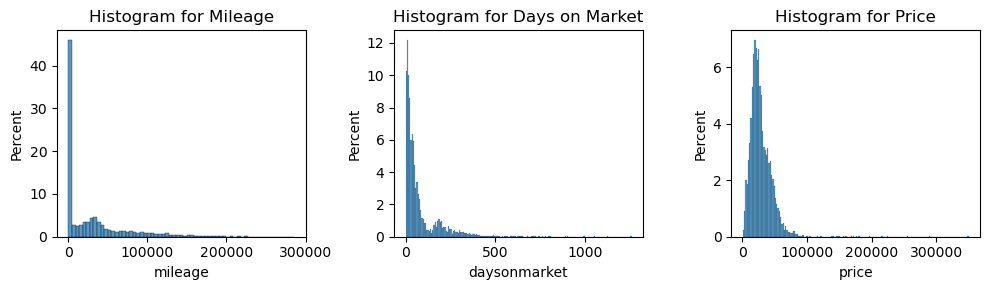

In [1]:
#Import pandas, read test and train data csv
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

import pandas as pd
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))  
sns.histplot(data=df_train, x='mileage', stat='percent', ax=axes[0])  
axes[0].set_title('Histogram for Mileage')
sns.histplot(data=df_train, x='daysonmarket', stat='percent',ax=axes[1])  
axes[1].set_title('Histogram for Days on Market')
sns.histplot(data=df_train, x='price', stat='percent', ax=axes[2])  
axes[2].set_title('Histogram for Price')
# Display the plot
plt.tight_layout()
plt.show()

In [2]:
df_train[[ 'mileage', 'daysonmarket','price']].describe().round(0)

,mileage,daysonmarket,price
count,6718.0,7000.0,7000.0
mean,31089.0,76.0,28851.0
std,44033.0,106.0,17583.0
min,0.0,0.0,650.0
25%,6.0,15.0,17986.0
50%,11454.0,36.0,25387.0
75%,43428.0,80.0,36992.0
max,285788.0,1259.0,350000.0


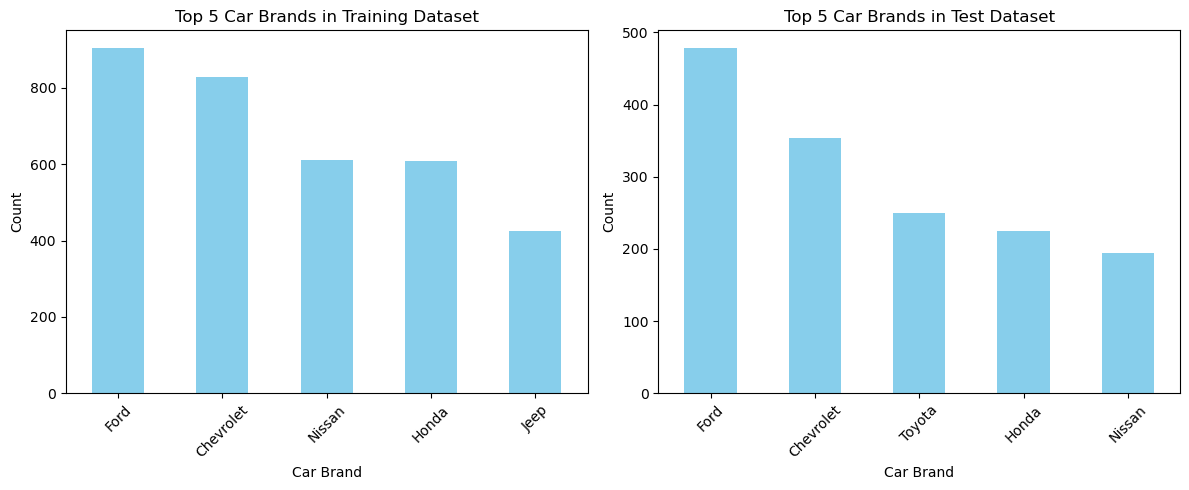

In [3]:
import matplotlib.pyplot as plt
brands_train = df_train['make_name'].value_counts().head(5)
brands_test = df_test['make_name'].value_counts().head(5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

brands_train.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 5 Car Brands in Training Dataset')
axes[0].set_xlabel('Car Brand')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

brands_test.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Top 5 Car Brands in Test Dataset')
axes[1].set_xlabel('Car Brand')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---

## Data Cleaning, Missing Observations and Feature Engineering



In [4]:
import re

def extract_horsepower(power_str):
    if isinstance(power_str, float):  # If the value is a float, convert it to a string
        power_str = str(power_str)
        
    # Regular expression to extract horsepower value
    pattern = r'(\d+) hp'  # Extracts digits followed by 'hp'
    match = re.search(pattern, power_str)
    if match:
        return int(match.group(1))
    else:
        return None

# Extract horsepower values
df_train['power'] = [extract_horsepower(power) for power in df_train['power']]
df_test['power'] = [extract_horsepower(power) for power in df_test['power']]

In [5]:

import re
import pandas as pd

# Define the function to extract numeric values
def extract_numeric_value(value):
    if isinstance(value, float):  # Check if the value is already a float
        return value
    # Regular expression to extract numeric value
    pattern = r'(\d+(\.\d+)?)'
    match = re.match(pattern, str(value))
    if match:
        return float(match.group(1))
    else:
        return None

# List of columns to process
columns_to_process = ['back_legroom', 'front_legroom', 'length', 'width', 'height', 'fuel_tank_volume', 'maximum_seating', 'wheelbase']

# Apply the function to each column in the training and test sets
for col in columns_to_process:
    df_train[col] = df_train[col].apply(extract_numeric_value)
    df_test[col] = df_test[col].apply(extract_numeric_value)


In [6]:
# Function to extract the numeric torque value
def extract_torque(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    # Regular expression to extract the numeric value before ' lb-ft'
    pattern = r'(\d+)\s*lb-ft'
    match = re.search(pattern, value)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the 'torque' column
df_train['torque'] = df_train['torque'].apply(extract_torque)
df_test['torque'] = df_test['torque'].apply(extract_torque)

**Seperating 'Listed Date'**: The listed_date column was transformed into three separate columns - listed_day, listed_month, and listed_year. This separation allowed for a more detailed exploration of date-related information.

In [7]:
#Split the listed_date column into 3 columns in training dataset
df_train['listed_date'] = pd.to_datetime(df_train['listed_date'], yearfirst=True)
df_train = df_train.assign(
    listed_day=df_train['listed_date'].dt.day,
    listed_month=df_train['listed_date'].dt.month,
    listed_year=df_train['listed_date'].dt.year
)

In [8]:
#Split the listed_date column into 3 columns in test dataset
df_test['listed_date'] = pd.to_datetime(df_test['listed_date'], yearfirst=True)
df_test['listed_day'] = df_test['listed_date'].dt.day
df_test['listed_month'] = df_test['listed_date'].dt.month
df_test['listed_year'] = df_test['listed_date'].dt.year

### Create 5 new features from the existing numerical variables which contain multiple items of information**

1. **'Engine Power per Liter'**: This metric is derived by dividing the power of the car by its engine displacement. Essentially, it helps us understand the power efficiency of each litre of engine displacement, which can be valuable in assessing the performance of different vehicles.
2. **'Dimensions Ratio'**: This feature quantifies the ratio of length to width of each car. By examining this ratio, we can gain insights into the relative proportions of the vehicle's dimensions, which may influence aspects such as stability and handling.
3. **'Fuel Efficiency Ratio'**: This metric represents the average of the city and highway fuel economy of each car. It provides a consolidated view of the vehicle's fuel efficiency across different driving conditions, aiding in the comparison of fuel efficiency between vehicles.
4. **'Mileage per Year'**: This metric calculates the average mileage covered by each car per year since its release year. It helps us understand the rate of mileage accumulation over time, which can be indicative of usage patterns and potential wear and tear.
5. **'Interior Volume'**: This feature is computed as the product of the length, width, and height of each car, providing an estimate of its interior space. Understanding the interior volume can be crucial for assessing comfort and practicality, especially in the context of passenger vehicles.


In [9]:

# 1. Engine Power per Liter
df_train['power_per_liter'] = df_train['power'] / df_train['engine_displacement']

# 2. Dimensions Ratio 0.02
df_train['dimensions_ratio'] = df_train['length'] / df_train['width']

# 3. Fuel Efficiency Ratio 0.36
df_train['fuel_efficiency_ratio'] = (df_train['city_fuel_economy'] + df_train['highway_fuel_economy']) / 2

# 4. Mileage per Year -0.43
df_train['mileage_per_year'] = df_train['mileage'] / (2024 - df_train['year']) 

# 5. Interior Volume 0.41
df_train['interior_volume'] = df_train['length'] * df_train['width'] * df_train['height']

In [10]:
# 1. Engine Power per Liter
df_test['power_per_liter'] = df_test['power'] / df_test['engine_displacement']

# 2. Dimensions Ratio 0.02
df_test['dimensions_ratio'] = df_test['length'] / df_test['width']

# 3. Fuel Efficiency Ratio 0.36
df_test['fuel_efficiency_ratio'] = (df_test['city_fuel_economy'] + df_test['highway_fuel_economy']) / 2

# 4. Mileage per Year -0.43
df_test['mileage_per_year'] = df_test['mileage'] / (2024 - df_test['year'])  # Assuming the current year is 2024

# 5. Interior Volume 0.41
df_test['interior_volume'] = df_test['length'] * df_test['width'] * df_test['height']

Impute the missing values for all features in both the training and test datasets.   


In [11]:

# Impute missing values in the training dataset with the mean
# Select numeric columns
numeric_columns = df_train.select_dtypes(include='number').columns

# Replace NaN values with each column's mean for numeric columns
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())


# Impute missing values in the testing dataset with the mean
# Select numeric columns
numeric_columns = df_test.select_dtypes(include='number').columns

# Replace NaN values with each column's mean for numeric columns
df_test[numeric_columns] = df_test[numeric_columns].fillna(df_test[numeric_columns].mean())

In [12]:

from sklearn.impute import SimpleImputer

# Function to impute missing values for categorical columns with the most frequent value
def impute_categorical_columns(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Create an imputer object with the most frequent strategy
    imputer = SimpleImputer(strategy='most_frequent')

    # Impute the missing values
    df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
    
    return df

# Impute missing values in training and test sets
df_train = impute_categorical_columns(df_train)
df_test = impute_categorical_columns(df_test)

## Encode all categorical variables appropriately 

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
# Calculate the frequency of each value in the 'engine type' column
frequency = df_train['engine_type'].value_counts()

# Get the 5 most frequent values
top_5 = frequency.nlargest(5).index

# Map the 'engine type' values to the 5 most frequent + 'other'
df_train['engine_type_mapped'] = df_train['engine_type'].apply(lambda x: x if x in top_5 else 'other')# Fit and transform the 'engine type mapped' column
df_train['engine_type_encoded'] = le.fit_transform(df_train['engine_type_mapped'])



df_test['engine_type_mapped'] = df_test['engine_type'].apply(lambda x: x if x in top_5 else 'other')
# Fit and transform the 'engine type mapped' column
df_test['engine_type_encoded'] = le.fit_transform(df_test['engine_type_mapped'])

In [14]:
# Fit and transform the 'engine type mapped' column
df_train['engine_type_encoded'] = le.fit_transform(df_train['engine_type_mapped'])
df_test['engine_type_encoded'] = le.fit_transform(df_test['engine_type_mapped'])
# Fit and transform the 'fuel type' column
df_train['fuel_type_encoded'] = le.fit_transform(df_train['fuel_type'])
df_test['fuel_type_encoded'] = le.fit_transform(df_test['fuel_type'])

# Fit and transform the 'is_new' column
df_train['is_new_encoded'] = le.fit_transform(df_train['is_new'])
df_test['is_new_encoded'] = le.transform(df_test['is_new'])


In [15]:
# Function to map, encode, and drop column values
def map_encode_and_drop(df_train, df_test, column_name, top_n=5):
    le = LabelEncoder()
    # Calculate the frequency of each value in the column
    frequency = df_train[column_name].value_counts()
    # Get the top n most frequent values
    top_n_values = frequency.nlargest(top_n).index
    # Map the column values to the top n most frequent + 'other' in both train and test
    df_train[f'{column_name}_mapped'] = df_train[column_name].apply(lambda x: x if x in top_n_values else 'other')
    df_test[f'{column_name}_mapped'] = df_test[column_name].apply(lambda x: x if x in top_n_values else 'other')
    
    # Fit and transform the mapped column
    df_train[f'{column_name}_encoded'] = le.fit_transform(df_train[f'{column_name}_mapped'])
    df_test[f'{column_name}_encoded'] = le.transform(df_test[f'{column_name}_mapped'])

    # Drop the original and mapped columns
    df_train.drop(columns=[column_name, f'{column_name}_mapped'], inplace=True)
    df_test.drop(columns=[column_name, f'{column_name}_mapped'], inplace=True)

# List of columns to process
columns_to_map = [
    'exterior_color', 'interior_color', 'body_type', 'model_name',
    'city', 'franchise_dealer', 'listing_color', 'make_name',
    'transmission', 'transmission_display'
]

# Apply the function to each column
for col in columns_to_map:
    map_encode_and_drop(df_train, df_test, col)

### Dropped the unnecessary columns and incorporated additional polynomial features into our model

In [16]:
# Since we have encoded all the categorical variables, we can drop those columns to maintain the concise and clean dataset. 
# Function to drop object-type columns excluding 'vin'
def drop_object_columns_except_vin(df):
    object_columns = df.select_dtypes(include=['object']).columns  # Select object-type columns
    object_columns = object_columns[object_columns != 'vin']  # Exclude 'vin' column
    df.drop(columns=object_columns, inplace=True)  # Drop object-type columns except 'vin'

# Apply the function to drop object-type columns except 'vin'
drop_object_columns_except_vin(df_train)
drop_object_columns_except_vin(df_test)

In [17]:
# In order to better predict the car-price, we added some polynomial features.
# We create the squared of 'horsepower', 'torque', and 'mileage' features.
from sklearn.preprocessing import PolynomialFeatures

# Select the features to create polynomial features
features_to_transform = ['horsepower', 'torque', 'mileage']

# Create polynomial features transformer
poly = PolynomialFeatures(degree=2, include_bias=False)  # Change degree to 2 for squared terms, 3 for cubed terms

# Fit and transform the selected features
polynomial_features = poly.fit_transform(df_train[features_to_transform])

# Get the names of the polynomial features
polynomial_feature_names = poly.get_feature_names_out(features_to_transform)

# Convert the transformed features back to DataFrame
polynomial_features_df = pd.DataFrame(
    polynomial_features,
    columns=polynomial_feature_names
)

# Concatenate the original DataFrame with the polynomial features DataFrame
df_train_with_polynomials = pd.concat([df_train, polynomial_features_df], axis=1)

In [18]:
# Transform the test dataset using the trained polynomial features transformer
polynomial_features_test = poly.transform(df_test[features_to_transform])

# Convert the transformed features of the test dataset back to DataFrame
polynomial_features_test_df = pd.DataFrame(
    polynomial_features_test,
    columns=polynomial_feature_names
)

# Concatenate the original test DataFrame with the polynomial features DataFrame
df_test_with_polynomials = pd.concat([df_test, polynomial_features_test_df], axis=1)


### Perform EDA to measure the relationship between the features and the target and carefully explain your findings. 

In [19]:
#call out all numeric columns and check their correlation with 'price' column
import seaborn as sns
import matplotlib.pyplot as plt

# List of features excluding 'price' and 'vin'
features = [col for col in df_train.columns if col not in ['price', 'vin']]

# Compute the correlation with 'price'
price_corr = df_train[['price'] + features].corr()['price'].drop('price')

# Display the top 20 correlated features with 'price'
print(price_corr.abs().sort_values(ascending=False).head(20))


horsepower                  0.618147
torque                      0.602940
power                       0.594718
mileage                     0.480523
year                        0.462949
mileage_per_year            0.451945
fuel_tank_volume            0.415923
interior_volume             0.414487
is_new_encoded              0.407299
width                       0.398082
wheelbase                   0.385918
length                      0.382043
engine_displacement         0.378950
highway_fuel_economy        0.371216
fuel_efficiency_ratio       0.362759
city_fuel_economy           0.340206
engine_type_encoded         0.322734
height                      0.314290
franchise_dealer_encoded    0.295939
back_legroom                0.275019
Name: price, dtype: float64



| Feature                   | Correlation with Price |
|---------------------------|------------------------|
| horsepower                | 0.618147               |
| torque                    | 0.602940               |
| power                     | 0.594718               |
| width                     | 0.398082               |
| mileage                   | 0.480523               |
| year                      | 0.462949               |
| length                    | 0.382043               |
| mileage_per_year          | 0.451945               |
| wheelbase                 | 0.385918               |
| fuel_tank_volume          | 0.415923               |
| interior_volume           | 0.414487               |
| is_new_encoded            | 0.407299               |



After examining the correlation between each feature and the price column, features with a correlation coefficient greater than 0.3 or less than -0.3 were selected for further analysis. This threshold was chosen to focus on features demonstrating a strong linear relationship with the price.

We observed that columns such as wheelbase, torque, power, and horsepower exhibit a strong positive correlation with price, with correlation coefficients ranging from 0.5 to 0.7. Similarly, features like mileage_per_year, year, fuel_tank_volume, is_new_encoded and interior volume also show significant positive correlations (0.5>x>0.4) with price.


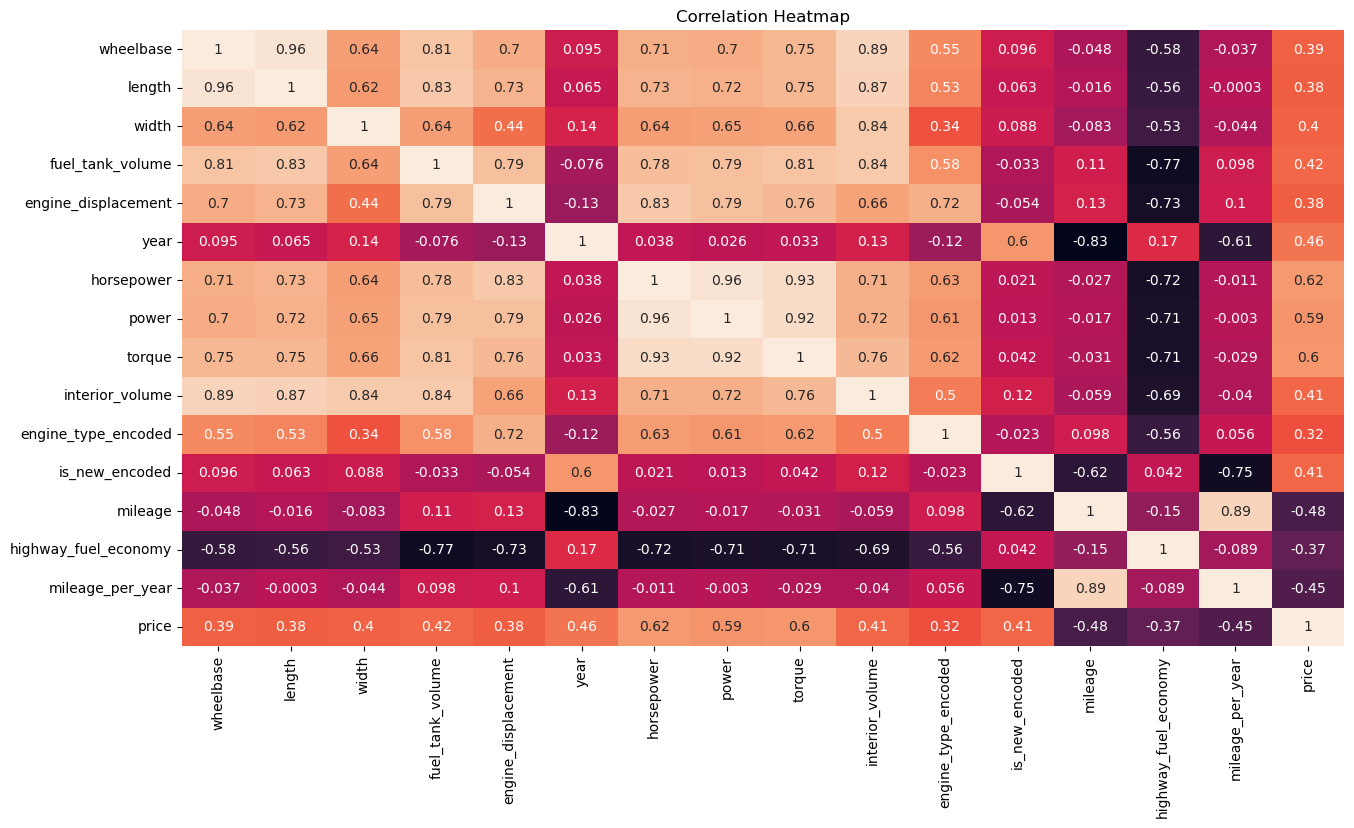

In [20]:
# selecting only the desired numeric columns from dataframe
train_subset_numeric = df_train[[ 'wheelbase', 'length', 'width', 'fuel_tank_volume', 'engine_displacement', 'year', 'horsepower', 'power', 
              'torque', 'interior_volume', 'engine_type_encoded', 'is_new_encoded', 'mileage', 'highway_fuel_economy', 'mileage_per_year', 'price']]

# defining the figure size
plt.figure(figsize=(15, 8))
# plotting the heatmap
sns.heatmap(train_subset_numeric.corr(), annot=True, cbar=False)
# set the title
plt.title('Correlation Heatmap')
# show the plot
plt.show()

--- 
### Fit and tune a forecasting model

### Best Features Identified:

After doing several iterations to extract the best features and fitting them to different models, we've identified that the best features that provided the highest MAPE are:

- fuel_tank_volume
- engine_type_encoded
- highway_fuel_economy
- horsepower
- year
- mileage
- engine_displacement
- is_new_encoded
- interior_volume
- fuel_efficiency_ratio
- daysonmarket
- savings_amount
- seller_rating
- power_per_liter
- body_type_encoded
- model_name_encoded
- back_legroom

We fitted these features to our first identified model, the Ridge Regression:

## Model 1: Ridge Regression Model

**Reason for use:** We used the Ridge Regression Model,a linear model with L2 regularization to handle multicollinearity and prevent overfitting. The regularization term stabilizes coefficient estimates, reducing the impact of less important features.

We defined our features and target variable, then initialized the Ridge model with an alpha value of 0.1, a value which balances regularization and model complexity, providing better performance without over-penalizing the coefficients. We fit the model to the training data and the target variable. 

In [21]:
#Define train and test subset
df_train_subset = df_train[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                            'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                            'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom', 'price']]

df_test_subset = df_test[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                          'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                          'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom','vin']]



In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


# Define the features and target
X_train = df_train_subset.drop('price', axis=1)
y_train = df_train_subset['price']
X_test = df_test_subset.drop('vin', axis=1)


# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)  

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
predicted_prices = ridge_model.predict(X_test)

# Add predictions to the test DataFrame
df_test_subset['predicted_price'] = predicted_prices

# Output the predictions along with 'vin'
output = df_test_subset[['vin', 'predicted_price']]
output.to_csv('output_ridge.csv', index=False)




| Metric                    | Value           |
|---------------------------|-----------------|
| Mean Absolute Percentage Error (MAPE) | 0.29712         |

Our Ridge regression model on Kaggle yielded a MAPE of 0.29712, indicating an average prediction error of 29.71%. This suggests the model captures a substantial portion of the price variance but has room for improvement.


In [54]:
from IPython.display import Image, display

from IPython.display import Image

# URL of the image uploaded to Imgur
img_url = 'https://i.imgur.com/NjTFweV.png'

# Display the image
display(Image(url=img_url))


## Model 2: Support Vector Regression (SVR)

**Reason for use:** After establishing a baseline with Ridge Regression, we decided to try Support Vector Regression (SVR) to capture more complex, non-linear relationships between features and car prices. SVR's ability to transform the input space into higher dimensions through the use of kernel tricks allows it to model intricate patterns in the data. This approach aimed to improve our predictions by leveraging SVR's strength in handling non-linear relationships.


Using the same features, we initialized the SVR model with an RBF kernel, a regularization parameter (C) of 1.0, and an epsilon value of 0.1. These parameters help balance model complexity and prediction accuracy. We fit the model to the training data to learn the underlying patterns between the features and the target variable.


In [24]:
#Define train and test subset
df_train_subset = df_train[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                            'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                            'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom', 'price']]

df_test_subset = df_test[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                          'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                          'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom','vin']]



In [25]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Define the features and target
X_train = df_train_subset.drop('price', axis=1)
y_train = df_train_subset['price']
X_test = df_test_subset.drop('vin', axis=1)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can tune the kernel, C, and epsilon parameters if needed

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Predict on the test data
predicted_prices = svr_model.predict(X_test)

# Add predictions to the test DataFrame
df_test_subset['predicted_price'] = predicted_prices

# Output the predictions along with 'vin'
output = df_test_subset[['vin', 'predicted_price']]
output.to_csv('output_svr.csv', index=False)





| Metric                    | Value           |
|---------------------------|-----------------|
| Mean Absolute Percentage Error (MAPE) | 0.57478         |


As a result, our SVR model yielded a MAPE of 0.57478. This model performed poorly since the average percentage error is around 57.48%, which is nearly double the percentage error from our first model.These results highlight the limitations of the SVR model with the current parameters, guiding us to explore further tuning or alternative models.

In [52]:

from IPython.display import Image

# URL of the image uploaded to Imgur
img_url = 'https://i.imgur.com/dKkynjj.png'

# Display the image
display(Image(url=img_url))



## Model 3: Random Forest Regressor

**Reason for use:** Finally, we explored the Random Forest Regressor to enhance our predictive performance further. Random Forests are particularly effective at managing large numbers of input features and their complex interactions by averaging the predictions of multiple decision trees. We chose this approach to take advantage of Random Forest's robustness and accuracy in various scenarios.

We initialized the Random Forest Regressor with 100 estimators and a random state of 42 for reproducibility. These settings help balance the model's complexity and prediction accuracy. 


In [27]:
#Define train and test subset
df_train_subset = df_train[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                            'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                            'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom', 'price']]

df_test_subset = df_test[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                          'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                          'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom','vin']]



In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Define the features and target
X_train = df_train_subset.drop('price', axis=1)
y_train = df_train_subset['price']
X_test = df_test_subset.drop('vin', axis=1)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
predicted_prices = rf_model.predict(X_test)

# Add predictions to the test DataFrame
df_test_subset['predicted_price'] = predicted_prices

# Output the predictions along with 'vin'
output = df_test_subset[['vin', 'predicted_price']]
output.to_csv('output_rf.csv', index=False)






| Metric                    | Value           |
|---------------------------|-----------------|
| Mean Absolute Percentage Error (MAPE) | 0.12190         |

When we uploaded our Random Forest model to Kaggle, it yielded a MAPE of 0.12190, making it a more accurate and reliable model compared to previous models.

In [51]:

from IPython.display import Image

# URL of the image uploaded to Imgur
img_url = 'https://i.imgur.com/AApAA5G.png'

# Display the image
display(Image(url=img_url))



## Model 4: Stacked Ensemble Model

**Reason for use:** To maximize the predictive power and leverage the strengths of multiple algorithms, we developed a Stacked Ensemble Model combining Ridge Regression and Random Forest Regressor. We excluded the SVR model due to its poor performance, as indicated by a negative R² and high error metrics. The SVR did not capture the variance in the target variable effectively, making it unsuitable for our model.

In this stacking method, we  StandardScaler for standardizing the features before applying Ridge regression. The hyperparameter tuning for Ridge regression is handled internally by RidgeCV, which performs cross-validation to select the best regularization parameter. For the Random Forest, we set the number of trees in the forest to 100, with random_state=42 to ensure reproducibility of the results.

In [30]:
#Define train and test subset
df_train_subset = df_train[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                            'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                            'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom', 'price']]

df_test_subset = df_test[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                          'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                          'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom','vin']]


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error



# Define the features and target
X_train = df_train_subset.drop('price', axis=1)
y_train = df_train_subset['price']
X_test = df_test_subset.drop('vin', axis=1)

# Define the base models
estimators = [
    ('ridge', make_pipeline(StandardScaler(), RidgeCV())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)

# Fit the model
stacking_regressor.fit(X_train, y_train)

# Predict prices
predicted_prices = stacking_regressor.predict(X_test)

# Add predictions to test DataFrame
df_test_subset['predicted_price'] = predicted_prices

# Output the predictions along with 'vin'
output = df_test_subset[['vin', 'predicted_price']]
output.to_csv('output_stacked_1.csv', index=False)





| Metric                    | Value           |
|---------------------------|-----------------|
| Mean Absolute Percentage Error (MAPE) | 0.12223         |

When we uploaded our Stacking Regressor model (combining Random Forest and Ridge Regression) to Kaggle, it yielded a MAPE of 0.12223. This indicates that the average percentage error in our predictions is around 12.22%, which is very close to the Random Forest model's MAPE of 0.12190. 

Compared to the individual models, the Stacking Regressor performs slightly weaker than the Random Forest, but we see a potential to still try ti improve it by doing cross validation and hyperparameter tuning. 


In [50]:

from IPython.display import Image

# URL of the image uploaded to Imgur
img_url = 'https://i.imgur.com/buOOvVC.png'

# Display the image
display(Image(url=img_url))



## Improved Stacked Model: Ridge Regression and Random Forest Regressor

To further enhance our ensemble model, we incorporated hyperparameter tuning for both Ridge Regression and Random Forest Regressor. The goal was to fine-tune the model parameters to achieve optimal performance.


### Steps and Choices:


1. **Base Models with Hyperparameter Tuning:**
   - **Ridge Regression:** We used a pipeline that included standard scaling and Ridge Regression. We specified a range of alpha values (`0.1`, `1.0`, `10.0`) to find the optimal regularization parameter.
   - **Random Forest Regressor:** We defined a parameter grid with different numbers of estimators (`100`, `200`, `300`) and maximum depths (`10`, `20`, `30`). These parameters control the complexity and performance of the Random Forest.

2. **Cross-Validation:**
   - We first performed cross-validation on the initial stacking regressor to assess the baseline performance. This step provided an understanding of the model’s variance and bias across different folds.
   - The cross-validation MSE scores were calculated, with an average MSE of 42,060,949.9223, guiding us to the need for hyperparameter tuning.

3. **GridSearchCV for Hyperparameter Tuning:**
   - **Ridge Regression:** We used `GridSearchCV` with the defined alpha values to find the best Ridge model.
   - **Random Forest Regressor:** We similarly tuned the Random Forest model using `GridSearchCV` to identify the optimal combination of estimators and maximum depth.
   - The best parameters were found to be `{'ridge__alpha': 1.0}` for Ridge and `{'max_depth': 30, 'n_estimators': 300}` for Random Forest.

4. **Updated Stacking Regressor:**
   - We updated the Stacking Regressor with the tuned Ridge and Random Forest models as base estimators.
   - The final estimator was again RidgeCV, ensuring that the combination of base model predictions was optimized.


In [33]:
#Define train and test subset
df_train_subset = df_train[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                            'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                            'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom', 'price']]

df_test_subset = df_test[['fuel_tank_volume', 'engine_type_encoded', 'highway_fuel_economy', 'horsepower', 'year', 'mileage', 
                          'engine_displacement', 'is_new_encoded', 'interior_volume', 'fuel_efficiency_ratio', 'daysonmarket', 'savings_amount', 
                          'seller_rating', 'power_per_liter', 'body_type_encoded', 'model_name_encoded', 'back_legroom','vin']]


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Define the features and target
X_train = df_train_subset.drop('price', axis=1)
y_train = df_train_subset['price']
X_test = df_test_subset.drop('vin', axis=1)

# Define the base models with hyperparameter tuning
ridge_params = {'ridge__alpha': [0.1, 1.0, 10.0]}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}

# Perform cross-validation
stacking_regressor = StackingRegressor(
    estimators=[
        ('ridge', make_pipeline(StandardScaler(), Ridge())),
        ('rf', RandomForestRegressor(random_state=42))
    ],
    final_estimator=Ridge()
)

scores = cross_val_score(stacking_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation MSE scores: {-scores}')
print(f'Average cross-validation MSE: {-scores.mean()}')

# Hyperparameter tuning using GridSearchCV
grid_search_ridge = GridSearchCV(estimator=make_pipeline(StandardScaler(), Ridge()), param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

best_ridge = grid_search_ridge.best_estimator_
best_rf = grid_search_rf.best_estimator_

print(f'Best Ridge params: {grid_search_ridge.best_params_}')
print(f'Best RandomForest params: {grid_search_rf.best_params_}')

# Update the stacking regressor with tuned models
stacking_regressor = StackingRegressor(
    estimators=[
        ('ridge', best_ridge),
        ('rf', best_rf)
    ],
    final_estimator=Ridge()
)

# Fit the model
stacking_regressor.fit(X_train, y_train)

# Predict prices
predicted_prices = stacking_regressor.predict(X_test)

# Add predictions to test DataFrame
df_test_subset['predicted_price'] = predicted_prices

# Output the predictions along with 'vin'
output = df_test_subset[['vin', 'predicted_price']]
output.to_csv('output_stacked_2.csv', index=False)



Cross-validation MSE scores: [24251744.73873948 30383367.26011122 38221032.98971035 37336814.51860851
 76827207.96677433]
Average cross-validation MSE: 41404033.49478878
Best Ridge params: {'ridge__alpha': 1.0}
Best RandomForest params: {'max_depth': 20, 'n_estimators': 300}



| Metric                    | Value           |
|---------------------------|-----------------|
| Mean Absolute Percentage Error (MAPE) | 0.12174         |

When we uploaded our improved Stacking Regressor model, it yielded a MAPE of 0.12174. This indicates that the average percentage error in our predictions is around 12.17%, making it the best performing model among all we tested.

In [48]:

from IPython.display import Image

# URL of the image uploaded to Imgur
img_url = 'https://i.imgur.com/eOcK38w.png'

# Display the image
display(Image(url=img_url))



### Conclusion

In our evaluation of models for price prediction, the improved Stacking Regressor (combining Random Forest and Ridge Regression with hyperparameter tuning and cross-validation) achieved the best performance with a MAPE of 0.12174. This model provided the most accurate predictions, surpassing Ridge Regression, SVR, and the initial Stacking Regressor.


- **Ridge Regression:** 0.29712
- **Support Vector Regression (SVR):** 0.57478
- **Random Forest:** 0.12190
- **Stacking Regressor (Random Forest + Ridge):** 0.12223
- **Improved Stacking Regressor:** 0.12174

### Recommendation for Future Improvement

To further enhance the model's performance, we recommend the following steps:

1. **Feature Engineering:**
   - **Explore Other FeatureInteractions:** Conduct additional feature interactions that could capture more variance in the target variable. 


2. **Model Complexity and Diversity:**
   - **Incorporate More Diverse Models:** Introduce other types of models into the stacking ensemble, such as Nueral networks, to capture different patterns and improve overall prediction accuracy.
   - **Regularization Techniques:** Continue exploring different regularization techniques to prevent overfitting and enhance model generalization.

3. **Data Augmentation and Enrichment:**
   - **Increase Data Volume:** Collect more data to improve model training and validation. More data can help the model learn better and generalize well to unseen data.
   - **External Data Sources:** Integrate external data sources that might be relevant to the price prediction, such as economic indicators, market trends, or competitor pricing data.


By incorporating these recommendations, we can further refine our predictive model, potentially achieving even lower prediction errors and higher accuracy in car price predictions.
